In [2]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
x = joblib.load('essay_asap6_780_with350offtopic')
y = joblib.load('score_asap6_with350offtopic')

In [4]:
print(x.shape)
print(y.shape)

(2150, 780)
(2150,)


In [5]:
y[1800:] = -1

In [6]:
from collections import Counter
Counter(y)

Counter({2.0: 405, 3.0: 817, 4.0: 367, 1.0: 167, 0.0: 44, -1.0: 350})

### Plot the data using t-sne

In [18]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

import pandas as pd
data = pd.DataFrame()
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
data['y'] = y
data

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2150 samples in 0.091s...
[t-SNE] Computed neighbors for 2150 samples in 1.306s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2150
[t-SNE] Computed conditional probabilities for sample 2000 / 2150
[t-SNE] Computed conditional probabilities for sample 2150 / 2150
[t-SNE] Mean sigma: 8.881681
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.336483
[t-SNE] KL divergence after 1000 iterations: 0.399529
t-SNE done! Time elapsed: 18.336037635803223 seconds


,tsne-2d-one,tsne-2d-two,y
0,-17.733232,-30.663036,2.0
1,-1.986512,3.802882,3.0
2,-22.817221,19.181335,4.0
3,4.889483,1.704235,1.0
4,-29.580515,15.466015,3.0
...,...,...,...
2145,4.526377,45.034054,-1.0
2146,-8.994293,52.823795,-1.0
2147,-7.503749,51.981529,-1.0
2148,-5.545775,51.176498,-1.0


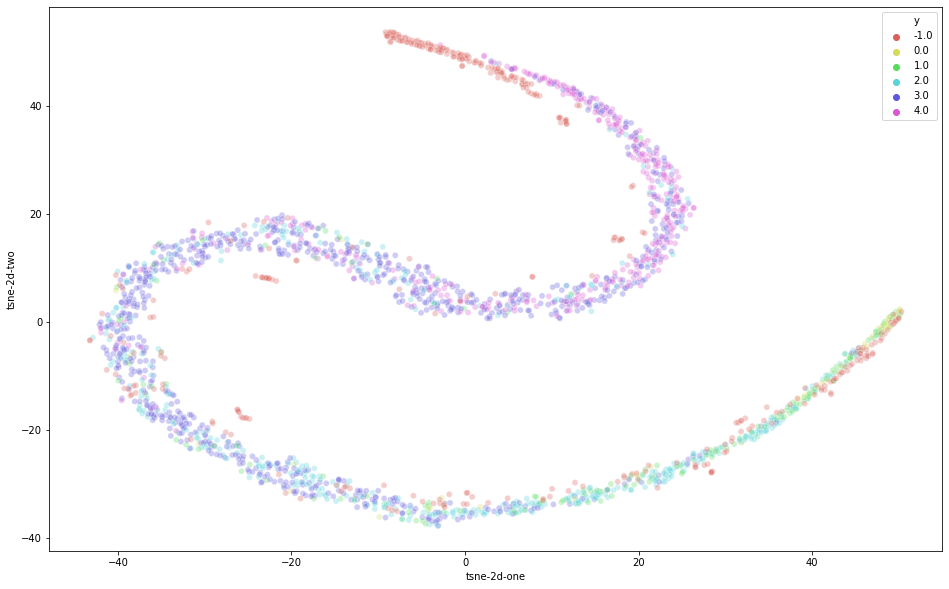

In [20]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette("hls", 6),
    data=data,
    legend="full",
    alpha=0.3
)

### Plot the data using PCA

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1]
data

,tsne-2d-one,tsne-2d-two,y,pca-one,pca-two
0,-17.733232,-30.663036,2.0,-298.085642,6.109757
1,-1.986512,3.802882,3.0,89.090580,-23.495811
2,-22.817221,19.181335,4.0,-30.899921,-37.708342
3,4.889483,1.704235,1.0,118.599471,-30.417422
4,-29.580515,15.466015,3.0,-45.291531,-30.491283
...,...,...,...,...,...
2145,4.526377,45.034054,-1.0,922.065608,115.544109
2146,-8.994293,52.823795,-1.0,3827.768318,239.089221
2147,-7.503749,51.981529,-1.0,3030.237042,236.043585
2148,-5.545775,51.176498,-1.0,2374.573489,158.308770


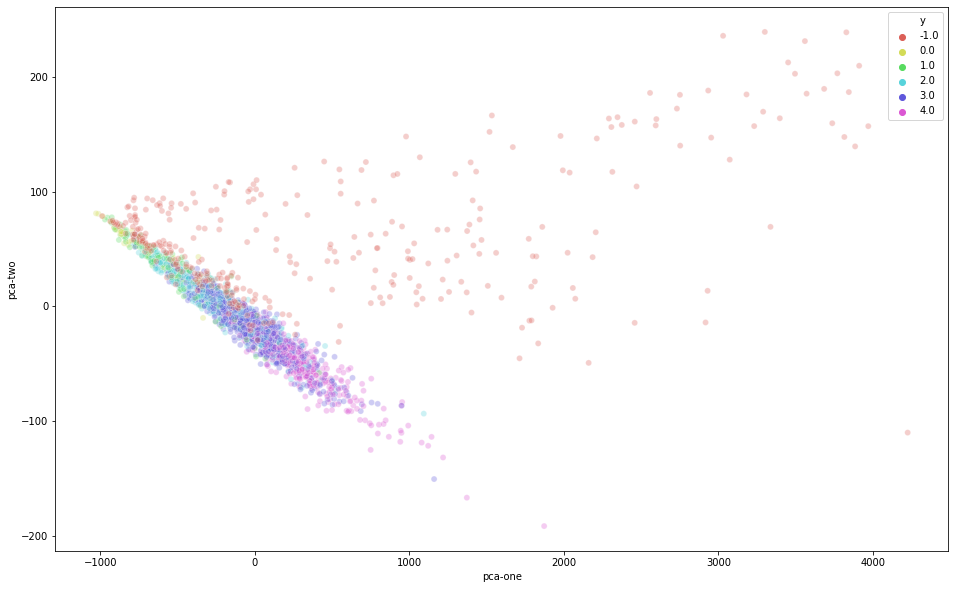

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='y',
    palette=sns.color_palette("hls", 6),
    data=data,
    legend="full",
    alpha=0.3
)

## Plot PCA and T-SNE

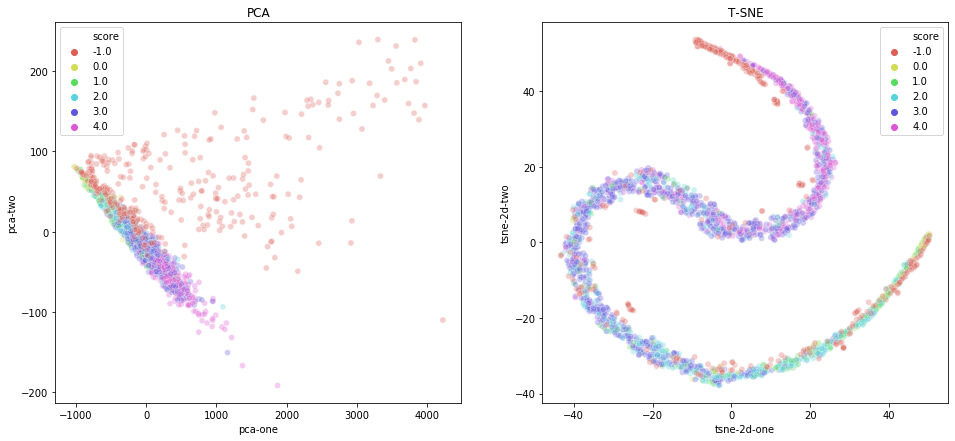

In [25]:
data['score'] = y

plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 6),
    data=data,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 6),
    data=data,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

## Only plot 12 interpretable features

In [30]:
x_12 = x[:,:12]
x_12.shape

(2150, 12)

In [31]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_12 = tsne.fit_transform(x_12)

pca = PCA(n_components=2)
pca_result_12 = pca.fit_transform(x_12)

data_12 = pd.DataFrame()
data_12['tsne-2d-one'] = tsne_results_12[:,0]
data_12['tsne-2d-two'] = tsne_results_12[:,1]
data_12['pca-one'] = pca_result_12[:,0]
data_12['pca-two'] = pca_result_12[:,1]
data_12['score'] = y

data_12

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2150 samples in 0.003s...
[t-SNE] Computed neighbors for 2150 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2150
[t-SNE] Computed conditional probabilities for sample 2000 / 2150
[t-SNE] Computed conditional probabilities for sample 2150 / 2150
[t-SNE] Mean sigma: 8.230545
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.080284
[t-SNE] KL divergence after 5000 iterations: 0.422212


,tsne-2d-one,tsne-2d-two,pca-one,pca-two,score
0,-48.519005,30.591658,-298.086192,6.148135,2.0
1,16.480293,-11.743728,89.091540,-23.486013,3.0
2,0.729817,17.014643,-30.898120,-37.657279,4.0
3,22.240383,-18.119081,118.599485,-30.474037,1.0
4,8.004866,25.637400,-45.289559,-30.438795,3.0
...,...,...,...,...,...
2145,93.403854,-16.806011,922.055531,115.415845,-1.0
2146,102.435837,-35.999962,3827.763300,239.149428,-1.0
2147,103.046547,-33.332291,3030.232209,236.192370,-1.0
2148,100.935547,-30.826975,2374.567907,158.292986,-1.0


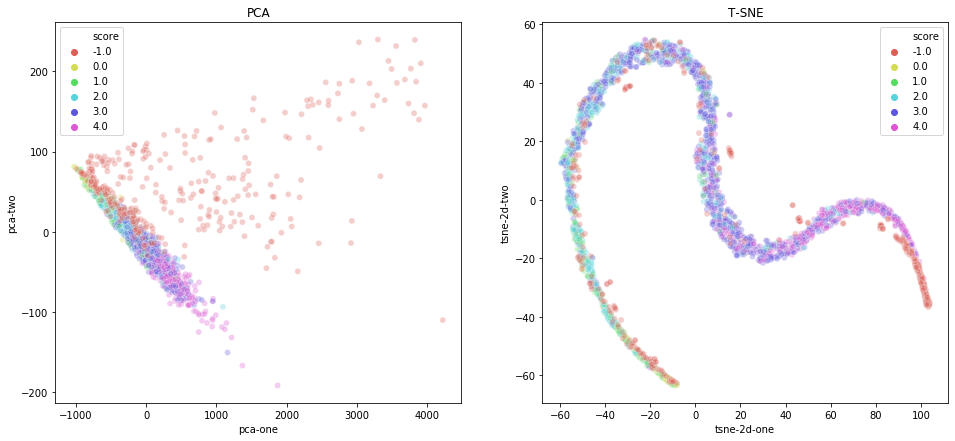

In [32]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 6),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 6),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

## Only SBert features (768-dim)

In [33]:
x_12 = x[:,12:]
x_12.shape

(2150, 768)

In [34]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_12 = tsne.fit_transform(x_12)

pca = PCA(n_components=2)
pca_result_12 = pca.fit_transform(x_12)

data_12 = pd.DataFrame()
data_12['tsne-2d-one'] = tsne_results_12[:,0]
data_12['tsne-2d-two'] = tsne_results_12[:,1]
data_12['pca-one'] = pca_result_12[:,0]
data_12['pca-two'] = pca_result_12[:,1]
data_12['score'] = y

data_12

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2150 samples in 0.103s...
[t-SNE] Computed neighbors for 2150 samples in 8.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2150
[t-SNE] Computed conditional probabilities for sample 2000 / 2150
[t-SNE] Computed conditional probabilities for sample 2150 / 2150
[t-SNE] Mean sigma: 1.430667
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.482819
[t-SNE] KL divergence after 5000 iterations: 1.807378


,tsne-2d-one,tsne-2d-two,pca-one,pca-two,score
0,24.453585,-3.766800,-1.553546,-1.666782,2.0
1,1.805052,-4.063807,-0.687021,0.525317,3.0
2,20.883150,-10.890118,-2.091734,-0.470140,4.0
3,-5.080591,-16.968739,1.377667,2.755707,1.0
4,12.029802,1.132343,-2.036496,-0.586516,3.0
...,...,...,...,...,...
2145,-36.061459,38.557652,6.426368,-3.736095,-1.0
2146,-37.294765,34.304733,6.729938,-0.622582,-1.0
2147,-40.994553,37.108105,3.326750,-2.229828,-1.0
2148,-36.745945,34.708611,5.661455,-1.679806,-1.0


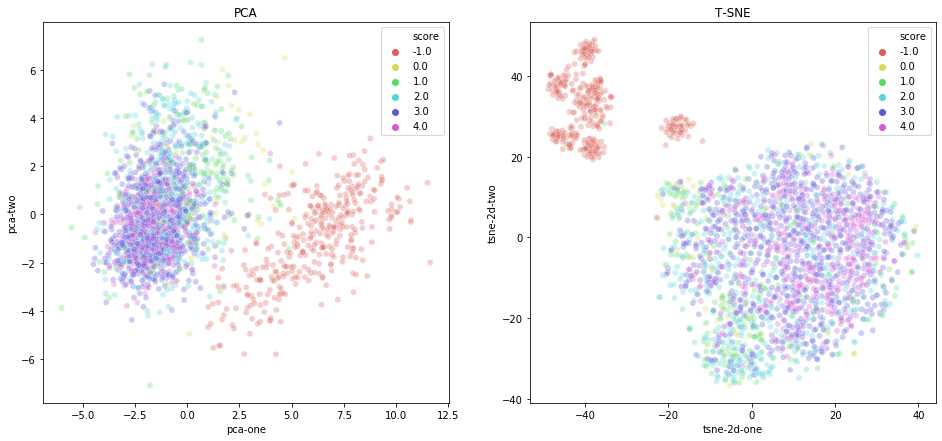

In [35]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 6),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 6),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

### 3 dimensions PCA

In [74]:
#pca = PCA(n_components=3)
#result = pca.fit_transform(x_12)

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=5000)
result = tsne.fit_transform(x_12)

xa = result[:,0]
xb = result[:,1] 
xc = result[:,2]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.000s...
[t-SNE] Computed neighbors for 1800 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 8.874955
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.746582
[t-SNE] KL divergence after 5000 iterations: 0.307037


No handles with labels found to put in legend.


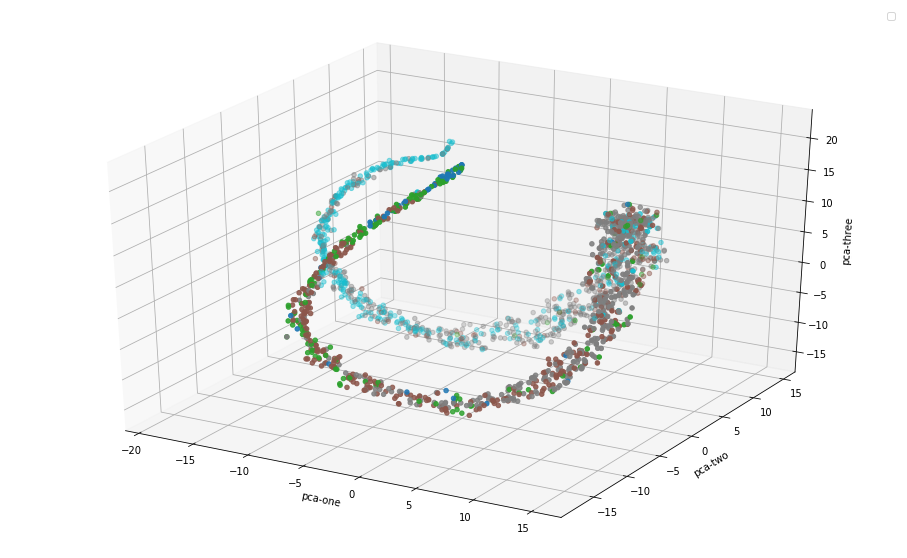

In [78]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=xa, 
    ys=xb, 
    zs=xc, 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.legend()
plt.show()

In [7]:
a1 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap1')
a2 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap2')
a3 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap3')
a4 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap4')
a5 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap5')
a6 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap6')
a7 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
a8 = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap8')

In [8]:
a_total = np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8), axis=0)
a_total.shape

(12978, 780)

## Plot all essays from ASAP 1-8 (only SBert)

In [19]:
x_all = a_total[:,12:]
x_all.shape

(12978, 768)

In [20]:
len(a6)

1800

In [21]:
sc = np.zeros(12978)
sc[:1783] = 1
sc[1783:3583] = 2
sc[3583:5309] = 3
sc[5309:7081] = 4
sc[7081:8886] = 5
sc[8886:10686] = 6
sc[10686:12255] = 7
sc[12255:] = 8

In [22]:
x_all.shape

(12978, 768)

In [23]:
sc.shape

(12978,)

In [27]:
sc = list(map(int, sc))

In [29]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_all = tsne.fit_transform(x_all)

pca = PCA(n_components=2)
pca_result_all = pca.fit_transform(x_all)

data_all = pd.DataFrame()
data_all['tsne-2d-one'] = tsne_results_all[:,0]
data_all['tsne-2d-two'] = tsne_results_all[:,1]
data_all['pca-one'] = pca_result_all[:,0]
data_all['pca-two'] = pca_result_all[:,1]
data_all['dataset'] = sc

data_all

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12978 samples in 0.970s...
[t-SNE] Computed neighbors for 12978 samples in 265.923s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12978
[t-SNE] Computed conditional probabilities for sample 2000 / 12978
[t-SNE] Computed conditional probabilities for sample 3000 / 12978
[t-SNE] Computed conditional probabilities for sample 4000 / 12978
[t-SNE] Computed conditional probabilities for sample 5000 / 12978
[t-SNE] Computed conditional probabilities for sample 6000 / 12978
[t-SNE] Computed conditional probabilities for sample 7000 / 12978
[t-SNE] Computed conditional probabilities for sample 8000 / 12978
[t-SNE] Computed conditional probabilities for sample 9000 / 12978
[t-SNE] Computed conditional probabilities for sample 10000 / 12978
[t-SNE] Computed conditional probabilities for sample 11000 / 12978
[t-SNE] Computed conditional probabilities for sample 12000 / 12978
[t-SNE] Computed conditional probabilities for 

,tsne-2d-one,tsne-2d-two,pca-one,pca-two,score
0,65.469086,-34.836571,-1.861563,-0.796473,1
1,60.090218,-45.738682,-1.994642,0.154141,1
2,60.222473,-39.311848,-0.618365,1.708624,1
3,59.364799,-37.614605,-1.348694,0.138023,1
4,53.136570,-38.012749,-2.295271,0.668204,1
...,...,...,...,...,...
12973,-15.939391,28.924845,-2.432514,-1.163381,8
12974,-6.940709,26.809364,-1.371861,0.692145,8
12975,-19.979198,23.512716,-1.306465,-0.519114,8
12976,-7.323589,28.634359,-0.812866,0.980629,8


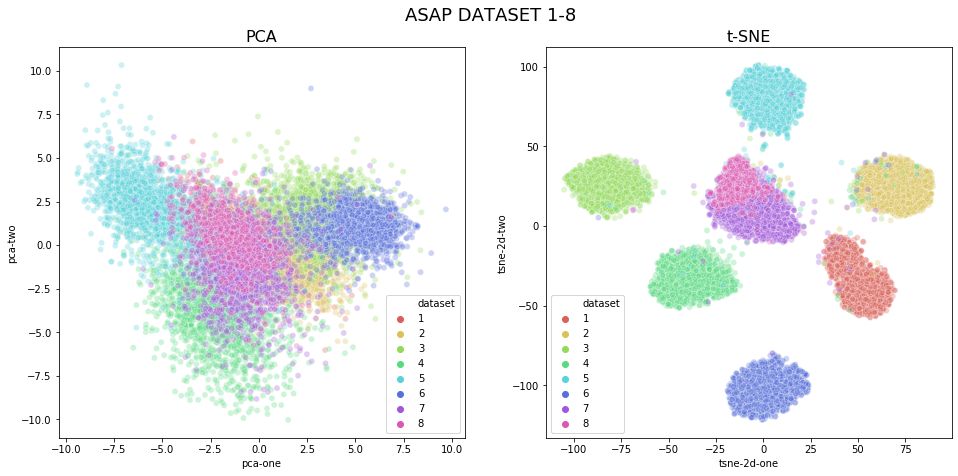

In [48]:
plt.figure(figsize=(16,7))

plt.suptitle("ASAP DATASET 1-8", size=18)
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA', size=16)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="dataset",
    palette=sns.color_palette("hls", 8),
    data=data_all,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('t-SNE', size=16)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dataset",
    palette=sns.color_palette("hls", 8),
    data=data_all,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.subplots_adjust(top=0.9)

plt.savefig('pca_tsne_all.png', bbox_inches="tight")

### Find separation between ASAP7 and ASAP8

In [106]:
a_7_8 = np.concatenate((a7, a8), axis=0)
a_7_8.shape

(2292, 780)

In [107]:
sc78 = np.zeros(2292)

In [108]:
sc78[:1569] = 7
sc78[1569:] = 8

In [109]:
x_7_8 = a_7_8[:,12:]
x_7_8.shape

(2292, 768)

In [110]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_78 = tsne.fit_transform(x_7_8)

pca = PCA(n_components=2)
pca_result_78 = pca.fit_transform(x_7_8)

data_78 = pd.DataFrame()
data_78['tsne-2d-one'] = tsne_results_78[:,0]
data_78['tsne-2d-two'] = tsne_results_78[:,1]
data_78['pca-one'] = pca_result_78[:,0]
data_78['pca-two'] = pca_result_78[:,1]
data_78['score'] = sc78

data_78

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2292 samples in 0.127s...
[t-SNE] Computed neighbors for 2292 samples in 10.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2292
[t-SNE] Computed conditional probabilities for sample 2000 / 2292
[t-SNE] Computed conditional probabilities for sample 2292 / 2292
[t-SNE] Mean sigma: 1.699610
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.065079
[t-SNE] KL divergence after 5000 iterations: 1.947199


,tsne-2d-one,tsne-2d-two,pca-one,pca-two,score
0,-6.855638,-37.358524,0.702329,0.329043,7.0
1,31.670742,-0.549012,5.801023,1.741359,7.0
2,28.493479,14.528703,8.252267,4.502499,7.0
3,-26.609585,-14.079523,-2.813925,-1.952129,7.0
4,-8.531103,-26.141159,0.244782,-2.996753,7.0
...,...,...,...,...,...
2287,10.278302,27.866610,0.483126,2.446011,8.0
2288,11.473831,-4.941231,-1.227948,0.391835,8.0
2289,12.130629,23.375084,1.021793,2.798580,8.0
2290,-2.606479,25.966349,-1.536931,2.395577,8.0


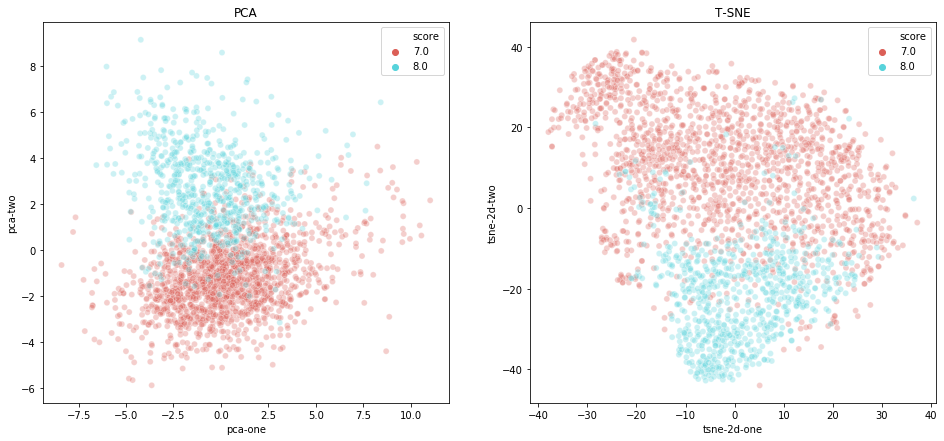

In [111]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 2),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 2),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne_78.png', bbox_inches="tight")